<a href="https://colab.research.google.com/github/abhivadali13/IntroGit/blob/master/HHClimateNYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set Up

In [13]:
#importing the required libraries
import pandas as pd
from urllib.parse import urlencode
import requests
from datetime import datetime
import os
import numpy as np
import ast
import matplotlib.pyplot as plt
import math, time, random, datetime
import seaborn as sns
from ast import literal_eval

#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from requests.auth import HTTPBasicAuth
import requests
from io import StringIO
from sklearn.metrics import mean_absolute_error

In [2]:
#importing drive and mounting it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#checking the contents of my drive
os.chdir("/content/drive/My Drive/Misc/HHClimate")
!ls

HHClimate.ipynb  test-data.csv


In [4]:
#cd'ing into the folder that has all the files required for this project
%cd "/content/drive/My Drive/Misc/HHClimate"

/content


### Collecting our Data

In [23]:
#function that takes in user input for lat/long
#example coordinates for nyc: 40.7128° N, 74.0060° W
def user_input():
  lat = float(input("Please enter a valid latitude: "))
  longitude = float(input("Please enter a valid longitude: "))
  return lat, longitude

user_lat, user_long = user_input()

Please enter a valid latitude: 40.7128
Please enter a valid longitude: 74.0060


In [24]:
#function that calls the meteomatics API for sample coordinates and returns a dataframe of the data
def api_call(latitude, longitude):
  response = requests.get('https://api.meteomatics.com/2021-01-01T00:00:00Z--2022-03-31T00:00:00Z:PT1H/t_mean_100m_1h:C,relative_humidity_mean_100m_1h:p,pressure_mean_100m_1h:psi,wind_gusts_100m_1h:mph,wind_speed_mean_100m_1h:mph,air_density_mean_100m_1h:kgm3/' + str(latitude) + ',' + str(longitude) + '/csv', auth=HTTPBasicAuth("hackhouse_hertel", "vuD497eGSI"))
  df = pd.read_csv(StringIO(response.text), sep=";")
  return df

nyc_df = api_call(user_lat, user_long)
nyc_df.head(5)

,validdate,t_mean_100m_1h:C,relative_humidity_mean_100m_1h:p,pressure_mean_100m_1h:psi,wind_gusts_100m_1h:mph,wind_speed_mean_100m_1h:mph,air_density_mean_100m_1h:kgm3
0,2021-01-01T00:00:00Z,-17.5,19.4,9.0356,21.3,21.3,0.849
1,2021-01-01T01:00:00Z,-17.7,19.7,9.0331,22.9,25.8,0.849
2,2021-01-01T02:00:00Z,-17.9,19.6,9.0352,23.5,25.8,0.850
3,2021-01-01T03:00:00Z,-17.9,20.4,9.0398,23.6,26.3,0.851
4,2021-01-01T04:00:00Z,-18.0,22.0,9.0449,24.6,27.1,0.851


### Formatting the Data

In [27]:
#function that splits up our data into two dataframes, 1 with the data from the previous hour, and one with the data for the next hour
#this function also splits up the data into labels
def data_splitter(dataframe):
  dataframe = dataframe.assign(wind_speed_mean_100m_next_1h=np.roll(dataframe["wind_speed_mean_100m_1h:mph"].values, -1))
  X = dataframe[["wind_speed_mean_100m_1h:mph"]].values
  y = dataframe[["wind_speed_mean_100m_next_1h"]].values
  return X, y

X, y = data_splitter(nyc_df)

### Building our Model

Our MAE is:  0.9322373538525079



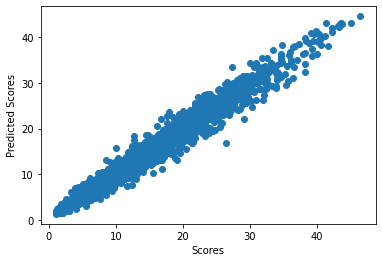

In [29]:
#a function that splits our data into train/test splits, builds a model and returns the MAE and a plot of our results
def model_builder(x_dataframe, y_dataframe):
  X_train, X_test, y_train, y_test = train_test_split(x_dataframe, y_dataframe, test_size=0.33, random_state=42)

  #instantiating a simple linear model
  linear = linear_model.LinearRegression()

  #fitting our model
  predictions = linear.fit(X_train, y_train).predict(X_test)

  #plotting the results
  print('Our MAE is: ', mean_absolute_error(predictions, y_test))
  print()
  plt.scatter(y_test, predictions)
  plt.xlabel('Scores')
  plt.ylabel('Predicted Scores')
  plt.show()

model_builder(X, y)